# Experiment 2. Predicting risk of breast cancer

## Import libriaries

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import utils  # Module with all hand-crafted methods

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


## Parameter definition

In [2]:
random_state = 42  # To enable reproducibility

## Read the dataset and filter columns

In [3]:
# Read dataset
lifestyle = pd.read_excel(
    "../data/Lifestyle.xlsx",
    usecols = "B:W"
)

# Correlated columns to the target (Group)
corr_cols = ['Group', 'Adjuvant Treatment', 'Stage', 'Estrogen Receptor Positive', 'Surgery yes or no', 'Months Since Treatment End']

# Store dropped columns and create a boolean column with our study target
labels = lifestyle[corr_cols]
labels['Cancer'] = lifestyle['Group'] == 'BreastCancer'

# Drop correlated columns
data = lifestyle.drop(columns = corr_cols)

# Print the shape of each DataFrame
print(lifestyle.shape, data.shape, labels.shape)

(58, 22) (58, 16) (58, 7)


## Compute baseline

We compute a baseline which serves as an indicator of whether or not our models improve the performance of a simpler model or not.

In [4]:
baseline = utils.assess_baseline(data, labels['Cancer'])

## Predicting risk of breast cancer

We now try to predict our target column $\textit{Cancer}$ using different ML algorithms.

In [5]:
summary = pd.concat([baseline, utils.compare_models(data, labels, 'Cancer')], axis=0, ignore_index=True)

summary.head(7)

,Model,Accuracy,Precision,Recall,F1-Score,MCC
0,Baseline,0.750000,0.800000,0.666667,0.727273,0.507093
1,Logistic Regression,0.672727,0.676190,0.666667,0.667179,0.343042
2,Decision Tree,0.446970,0.466667,0.500000,0.482051,-0.114966
3,Random Forest,0.503030,0.439286,0.566667,0.494505,-0.023466
4,XGBoost,0.433333,0.441429,0.433333,0.433706,-0.144522
5,SVM,0.656061,0.626190,0.800000,0.700659,0.331048
6,K-Nearest Neighbors,0.481818,0.499603,0.666667,0.570403,-0.061214


Moreover, we try to do the same with data augmentation using $\textbf{SMOTE}$.

In [6]:
smote_summary = pd.concat([baseline, utils.compare_models(data, labels, 'Cancer', True)], axis=0, ignore_index=True)

smote_summary.head(7)

,Model,Accuracy,Precision,Recall,F1-Score,MCC
0,Baseline,0.750000,0.800000,0.666667,0.727273,0.507093
1,Logistic Regression,0.707576,0.733333,0.666667,0.695152,0.415698
2,Decision Tree,0.483333,0.525000,0.533333,0.521099,-0.036905
3,Random Forest,0.487879,0.469286,0.466667,0.463337,-0.045240
4,XGBoost,0.450000,0.458095,0.433333,0.438151,-0.106102
5,SVM,0.569697,0.588571,0.633333,0.605894,0.131131
6,K-Nearest Neighbors,0.398485,0.414286,0.466667,0.437363,-0.216008


## Interpretability

Follow the same path as in $\textit{Experiment 1}$, we plot the most relevant features for our predictions.

  0%|          | 0/12 [00:00<?, ?it/s]

Plotting SHAP values for predicting Cancer using Logistic Regression...


<Figure size 1200x800 with 0 Axes>

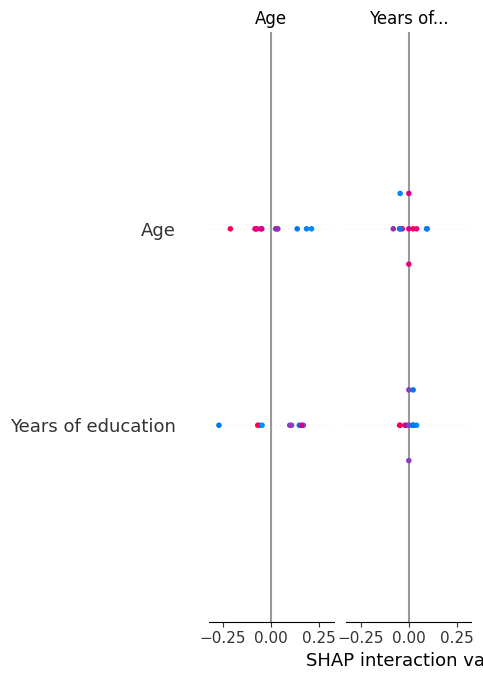

In [7]:
utils.plot_shap_values('Logistic Regression', data, labels, 'Cancer')

## Fairness

Finally, we define the protected attributes (in this case, only $\textit{Age}$) and compute the usual fairness metrics.

In [8]:
# Define age ranges
age_ranges = [18, 63, 100]  # Adjust ranges as needed
privileged = [0, 1]

# Create a new column with age categories
data['Age Group'] = pd.cut(data['Age'], bins=age_ranges, labels=privileged)

protected = ['Age Group']
priv_groups = [[{'Age Group': 1}]]
unpriv_groups = [[{'Age Group': 0}]]

In [9]:
utils.fairness_study('Logistic Regression', data, labels, 'Cancer', protected, priv_groups, unpriv_groups)

,Protected Attribute,SPD (BP),DI (BP),SPD (AP),DI (AP),EOD
0,Age Group,0.141667,1.354167,0.181818,inf,NaN
